<a href="https://colab.research.google.com/github/marismendi9/sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de ventas  para productos alimenticios vendidos en diversas tiendas
### Mariana Arismendi

## 1. Limpieza de los datos

In [39]:
#Importar la librería de pandas:
import pandas as pd

In [40]:
# Importar datos:
url = "https://raw.githubusercontent.com/marismendi9/sales-predictions/main/sales_predictions.csv"

In [41]:
#Leer archivo:
df = pd.read_csv(url)

## **Información de las columnas**
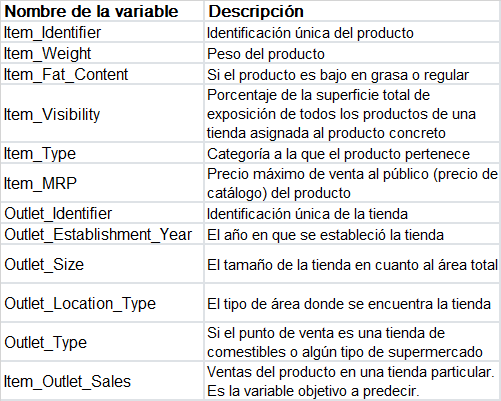

In [42]:
#Imprimir las primeras 5 columnas (verificar que se subió correctamente el archivo):
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
# Chequear si hay duplicados:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [44]:
# Vemos cuántos duplicados hay:
df.duplicated().sum()

0

In [45]:
# Corroboramos estén bien escritos los nombres de las columnas:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [46]:
# Tamaño del dataframe:
df.shape

(8523, 12)

In [47]:
# Examinar el número de valores únicos de cada columna:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [48]:
# Revisar tipos de datos y valores nulos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Los tipos de datos son consistentes, procedemos a analizar los valores nulos:

In [49]:
# Identificar el número de non-values de cada columna:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Comenzamos con Item_Weight:
Hay 8522 filas, 1559 productos diferentes y 415 diferentes pesos. Deducimos que los valores nulos están para productos que tienen su peso descrito en otras filas. O sea que por GroupBy, que omite nulos, podemos identificarlos para luego reemplazarlos.

In [50]:
# Agrupamos el Item_Identifier y el Item_Weight y luego reemplazamos los valores nulos con esta información:
x = df.groupby('Item_Identifier')['Item_Weight'].max()

df = df.set_index('Item_Identifier')
df['Item_Weight'] = df['Item_Weight'].fillna(x)
df = df.reset_index()

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
# Identificamos si quedan non-values en esta columna:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [52]:
# Vemos qué datos continuan siendo nulos en esta columna:
w_null = df[df['Item_Weight'].isnull()]
w_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [53]:
# Debido a que son productos únicos y que son muy pocos, reemplazamos su peso con la media de la columna
# Esto no afectará mucho la muestra y no perderemos datos
media = df['Item_Weight'].mean()
media

12.875420237117032

In [54]:
df['Item_Weight'].fillna(media, inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Los datos nulos restantes corresponden al tamaño de la tienda. Notamos que solo hay 10 tiendas. Procedemos a verificar si cada tienda tiene asignado su tamaño mediante un groupby para poder autocompletar los nulos con esta información

In [55]:
# Identificamos el tamaño de cada tienda
df.groupby('Outlet_Identifier')['Outlet_Size'].max()

Outlet_Identifier
OUT010       NaN
OUT013      High
OUT017       NaN
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045       NaN
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

Existen tres tiendas que no tienen la característica de tamaño definida y el único dato posible que sea constante en todos para compararlo son las ventas, ya que para Outlet_Location_Type, Outlet_Type y Outlet_Establishment_Year estos son independientes del Outlet_Size.

Se decidirá el tamaño de la tienda analizando sus ventas y comparando qué posición ocupan otros outlets respecto a las mismas.

In [56]:
# Visualizamos un promedio de ventas de acuerdo al tamaño de la tienda:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [57]:
# Visualizamos las ventas promedio de las tres tiendas sin el tamaño identificado:
## Tienda 1:
a = df['Outlet_Identifier'] == 'OUT010'
df[a].mean()

### La clasificamos como Small

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Item_Weight                    12.913153
Item_Visibility                 0.101457
Item_MRP                      140.777594
Outlet_Establishment_Year    1998.000000
Outlet_Size                          NaN
Item_Outlet_Sales             339.351662
dtype: float64

In [58]:
## Tienda 2:
b = df['Outlet_Identifier'] == 'OUT017'
df[b].mean()

### La clasificamos como Medium (a pesar de tener más ventas, el análisis arrojó mayor volumen de ventas en tiendas medianas respecto a las grandes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Item_Weight                    12.826668
Item_Visibility                 0.061377
Item_MRP                      139.421119
Outlet_Establishment_Year    2007.000000
Outlet_Size                          NaN
Item_Outlet_Sales            2340.675263
dtype: float64

In [59]:
## Tienda 3:
c = df['Outlet_Identifier'] == 'OUT045'
df[c].mean()

### La clasificamos como High

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Item_Weight                    12.649989
Item_Visibility                 0.060474
Item_MRP                      140.950246
Outlet_Establishment_Year    2002.000000
Outlet_Size                          NaN
Item_Outlet_Sales            2192.384798
dtype: float64

In [60]:
# Realizamos el reemplazo del tamaño de Outlet_Size una vez para cada una de las tiendas faltantes:
## Hallamos la primer fila donde aparece cada tienda para realizar los reemplazos con índices:
ind_a = (df.index[df['Outlet_Identifier'] == 'OUT010'].tolist())[0]
ind_b = (df.index[df['Outlet_Identifier'] == 'OUT017'].tolist())[0]
ind_c = (df.index[df['Outlet_Identifier'] == 'OUT045'].tolist())[0]
print(ind_a,ind_b,ind_c)

3 9 8


In [61]:
# Para OUT010:
df['Outlet_Size'][ind_a] = 'Small'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
# Para OUT017:
df['Outlet_Size'][ind_b] = 'Medium'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
# Para OUT045:
df['Outlet_Size'][ind_c] = 'High'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
# Verificamos que se hayan hecho los reemplazos:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,High,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [67]:
# Deducimos cambiar los tamaños a números para poderlos agrupar después con groupby y su posterior reemplazo:
dic_size = {'Small' : 3 , 'Medium' : 2 , 'High' : 1}

In [68]:
# Reemplazamos los nombres de la columna Outlet_Size por números:
df['Outlet_Size'].replace(dic_size, inplace = True)

In [69]:
# Aplicamos promedio para verificar que todos tengan el mismo valor:
df.groupby('Outlet_Identifier')['Outlet_Size'].mean()

Outlet_Identifier
OUT010    3.0
OUT013    1.0
OUT017    2.0
OUT018    2.0
OUT019    3.0
OUT027    2.0
OUT035    3.0
OUT045    1.0
OUT046    3.0
OUT049    2.0
Name: Outlet_Size, dtype: float64

In [70]:
# Procedemos a aplicar GroupBy para el reemplazo masivo:
y = df.groupby('Outlet_Identifier')['Outlet_Size'].mean()

df = df.set_index('Outlet_Identifier')
df['Outlet_Size'] = df['Outlet_Size'].fillna(y)
df = df.reset_index()

In [71]:
# Verificamos si quedan valores nulos:
df.isna().sum()

Outlet_Identifier            0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [72]:
# Y verificamos los valores únicos:
df['Outlet_Size'].unique()

array([2., 3., 1.])

In [73]:
# Creamos un diccionario de los datos con su nombre original:
dic_size_2 = {1:'High', 2: 'Medium', 3 : 'Small'}
dic_size_2

{1: 'High', 2: 'Medium', 3: 'Small'}

In [74]:
# Reemplazmos otra vez:
df['Outlet_Size'].replace(dic_size_2, inplace = True)
df.head()

,Outlet_Identifier,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,OUT049,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,OUT010,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,OUT013,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [75]:
# Ahora podemos identificar el tamaño de cada tienda:
df.groupby('Outlet_Identifier')['Outlet_Size'].max()

Outlet_Identifier
OUT010     Small
OUT013      High
OUT017    Medium
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045      High
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

In [76]:
# Visión de la info del dataframe al final de la limpieza:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Outlet_Identifier          8523 non-null   object 
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 2. Estadísticas resumidas de las columnas numéricas

In [77]:
# Resumen estadístico del dataframe:
round(df.describe(),3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000,8523.000,8523.000,8523.000,8523.000
mean,12.875,0.066,140.993,1997.832,2181.289
std,4.645,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,8.785,0.027,93.826,1987.000,834.247
50%,12.650,0.054,143.013,1999.000,1794.331
75%,16.850,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965
